In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.cos(2 * x) - 2 * np.sin(3 * x)

def f_d(x):
    return (-2) * (3 * np.cos(3 * x) + np.sin(2 * x))

# sp.lambdify(x, f_simb(x).diff(x), 'numpy')

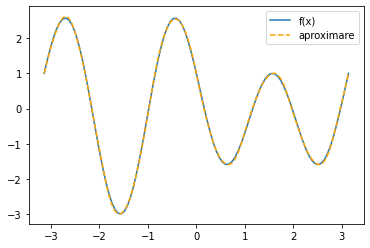

In [3]:
st, dr = -np.pi, np.pi
nr = 100
N = 20

x_gr = np.linspace(st, dr, nr)
y_gr = f(x_gr)

plt.plot(x_gr, y_gr, label='f(x)')

x = np.linspace(st, dr, N+1)
y = f(x)

h = x[1] - x[0]
a = y
b = np.zeros(N+1)
b[0] = f_d(x[0])
for j in range(N):
    b[j+1] = 2 * (y[j+1] - y[j]) / h - b[j]
c = [(y[j+1] - y[j] - h * b[j]) / (h ** 2) for j in range(N)]

def functie_spline(i):    
    return lambda t: a[i] + b[i] * (t - x[i]) + c[i] * (t - x[i]) ** 2


y_aprox = np.piecewise(
    x_gr,
    [
        (x[i] <= x_gr) & (x_gr < x[i + 1])
        for i in range(N - 1)
    ],
    [
        functie_spline(i)
        for i in range(N)
    ]
)

plt.plot(x_gr, y_aprox, color='orange', linestyle='--', label=f'aproximare')

plt.legend()
plt.show()